In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd
pd.__version__  # for the record

import mplfinance as mpf
mpf.__version__

import numpy as np
from matplotlib import ticker

import pprint
pp = pprint.PrettyPrinter(indent=2)

'1.5.1'

'0.12.9b6'

In [3]:
!pwd

/home/dino/code/mplfinance/examples/scratch_pad/issues


In [4]:
df = pd.read_csv('issue568.csv',index_col=0,parse_dates=True)
df.head(3)
df.tail(3)

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-03,17625.70,17625.70,17625.70,17625.70,16181
2022-01-04,17805.25,17805.25,17805.25,17805.25,18604
2022-01-05,17925.25,17925.25,17925.25,17925.25,23737


,Open,High,Low,Close,Volume
Date,,,,,
2022-10-27,17736.95,17736.95,17736.95,17736.95,24166
2022-10-28,17786.80,17786.80,17786.80,17786.80,19100
2022-10-31,18012.20,18012.20,18012.20,18012.20,19846


In [5]:
pnf_kwargs = dict(type='pnf', volume=True, figratio=(1, 1), figscale=5)
pnf_kwargs = dict(type='pnf', volume=False, figratio=(1, 1), figscale=1.5)

close_last_value = int(df['Close'].iloc[-1])
pnf_box_size = round(close_last_value * 0.01)
print("Box_Size is = " + str(pnf_box_size))

pnf_reversal = 3
print("Reversal is = " + str(pnf_reversal))

Box_Size is = 180
Reversal is = 3


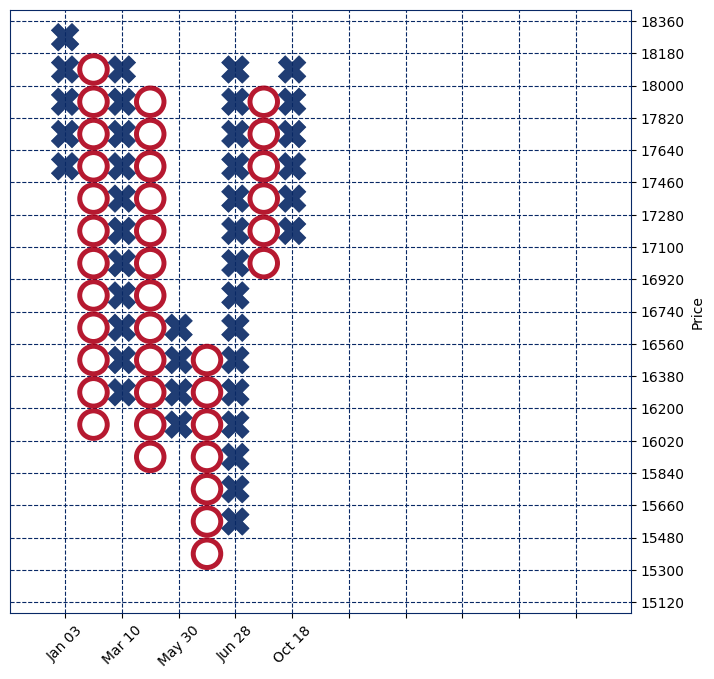

In [6]:
cv = {} # blank dict to hold return_calculated_values values

mpf.plot(df, **pnf_kwargs, style='starsandstripes',
         pnf_params=dict(box_size=pnf_box_size, reversal=pnf_reversal), 
         return_calculated_values=cv)

In [7]:
#pp.pprint(cv)

In [8]:
import yfinance as yf

In [9]:
df = yf.download('BRK-A',period='2y',interval='1d')#,auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


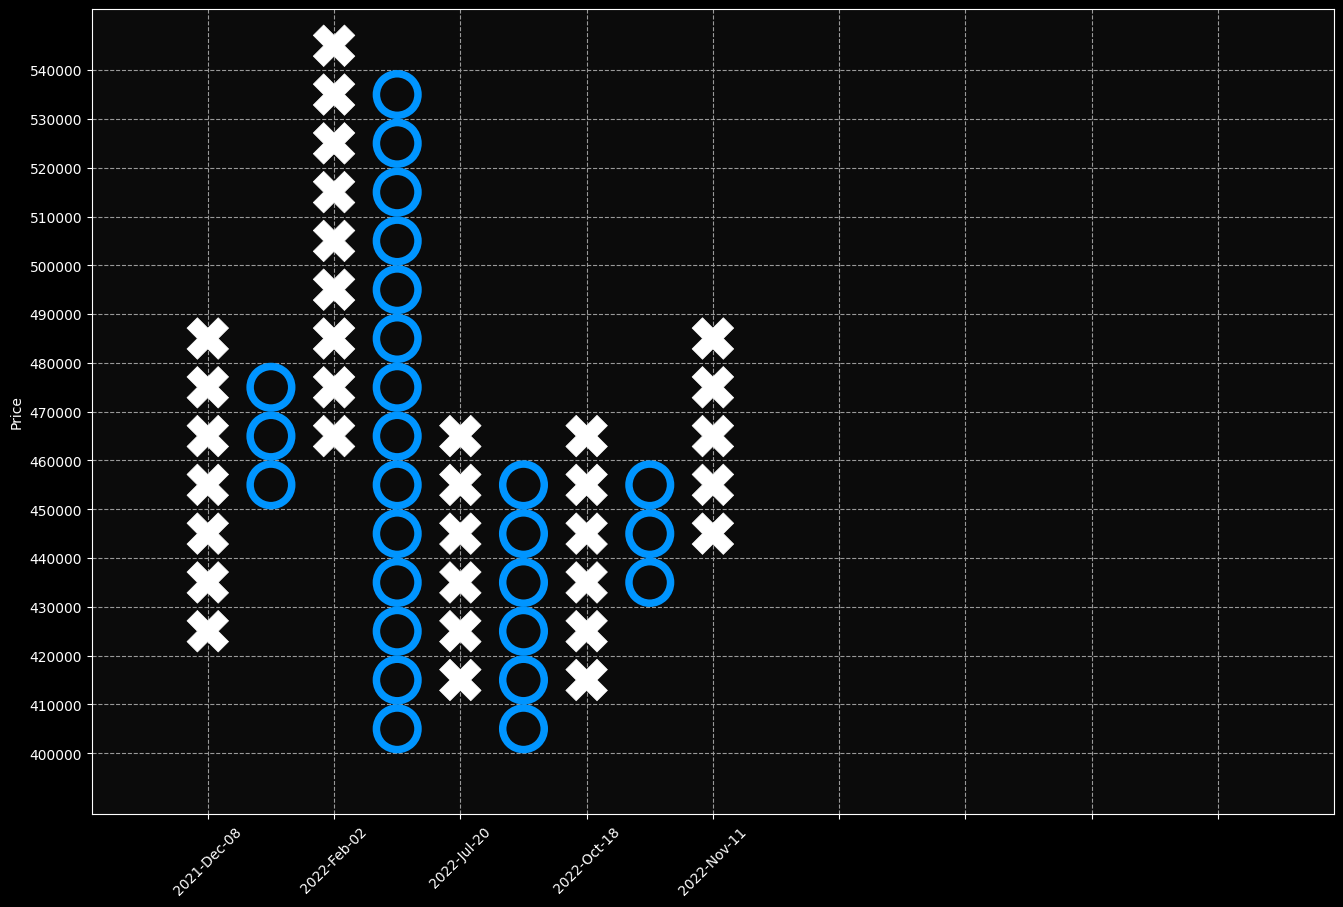

In [10]:
cv = {} # blank dict to hold return_calculated_values values
d1 = '2021-12-08'
#d1 = '2022-06-08'
d2 = '2022-12-08'
s  = 'nightclouds'
#s  = 'yahoo'
#s  = 'charles'
fig, axlist = mpf.plot(df.loc[d1:d2], type='pnf', style=s, figratio=(1.5,1), figscale=2,
         pnf_params=dict(box_size=10000, reversal=2), 
         return_calculated_values=cv, returnfig=True)#, volume=True)

In [11]:
cv.keys()

dict_keys(['pnf_dates', 'pnf_values', 'pnf_size', 'pnf_volumes', 'minx', 'maxx', 'miny', 'maxy'])

In [12]:
#cv['pnf_dates']
len(cv['pnf_dates'])
cv['minx'], cv['maxx']
len(range(int(round(cv['minx'],0)),int(round(cv['maxx'],0))))
print()
round(len(cv['pnf_dates'])/6,0)
len(cv['pnf_dates'])/5
len(cv['pnf_dates'])/6

round(29/10)

9

(-0.9411764705882353, 16.941176470588236)

18

2.0

1.8

1.5

3

In [13]:
axlist[-2].get_xticks()

array([-2,  0,  2,  4,  6,  8, 10, 12, 14, 16])

In [14]:
11/6

1.8333333333333333

In [15]:
STOP HERE

SyntaxError: invalid syntax (3031286301.py, line 1)

In [ ]:
df.head()

In [ ]:
infile = '../../data/SPY_20110701_20120630_Bollinger.csv'
testdf = pd.read_csv(infile,index_col=0,parse_dates=True)

In [ ]:
testdf

In [ ]:
pcv={}
#mpf.plot(testdf,type='pnf',style='nightclouds',volume=True,figscale=1.5,mav=(2,3,4),return_calculated_values=pcv)#,volume=True)
mpf.plot(testdf,type='pnf',style='nightclouds',volume=True,figscale=1.5,return_calculated_values=pcv)#,volume=True)
rcv={}
mpf.plot(testdf,type='renko',style='nightclouds',mav=(2,3,4),volume=True,return_calculated_values=rcv)

In [ ]:
#rcv
pcv.keys()
pcv

In [ ]:
mpf.plot(testdf,type='pnf',style='nightclouds',volume=False,figscale=1.5,
         pnf_params=dict(box_size=2.5,price_method='hilo'))
mpf.plot(testdf,type='pnf',style='nightclouds',volume=False,figscale=1.5,
         pnf_params=dict(box_size=2.5,price_method='close'))
mpf.plot(testdf,type='pnf',style='nightclouds',volume=False,figscale=1.5,
         pnf_params=dict(box_size=2.5,price_method='open'))
#mpf.plot(testdf,type='pnf',style='nightclouds',volume=False,figscale=1.5,
#         pnf_params=dict(box_size=2.5,price_method='high'))